# Lab 03. AirPassengers 데이터를 활용하여 모델 선택 및 예측 실습
---

- `AirPassengers` 데이터에는 항공 승객 수에 대한 월별 데이터로 구성되어 있다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

- 데이터를 불러와서 확인해본다.

In [2]:
# AirPassengers 데이터 로드
data = pd.read_csv('./data/airline-passengers.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)

print(data)

            Passengers
Month                 
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]


- 데이터를 시각화해본다.

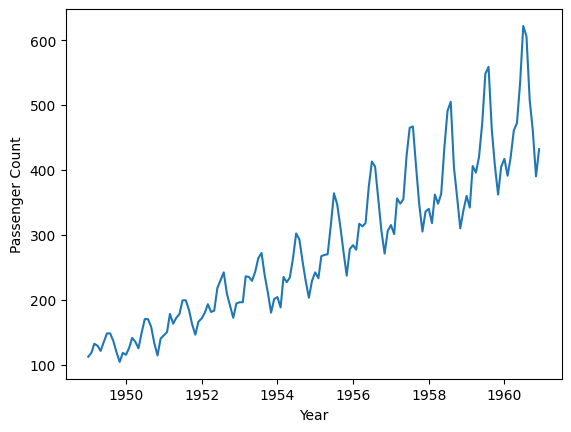

In [3]:
# 데이터 시각화
plt.plot(data)
plt.xlabel('Year')
plt.ylabel('Passenger Count')

plt.show()

- 자기 상관 함수(ACF) 및 부분 자기 상관 함수(PACF) 그래프를 그려본다.

c:\Users\kss34\anaconda3\envs\myEnv\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


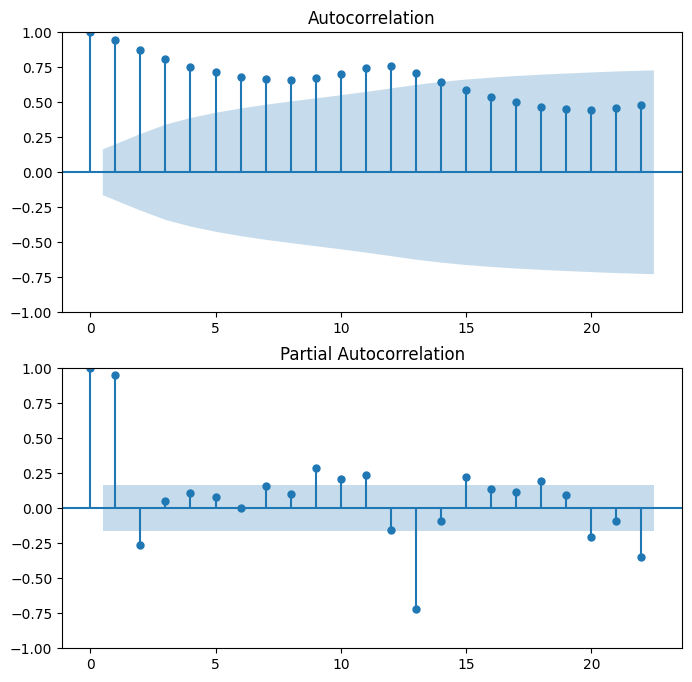

In [4]:
# 자기 상관 함수(ACF) 및 부분 자기 상관 함수(PACF) 그래프
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
plot_acf(data, ax=ax1)
plot_pacf(data, ax=ax2)

plt.show()

- ADF 검정(ADF Test)을 통해 시계열 데이터의 정상성을 검정해본다.

In [5]:
# ADF 검정
result = adfuller(data['Passengers'])

print('ADF Statistic', result[0])
print('p-value:', result[1])
print('Critical Values:')

for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic 0.8153688792060352
p-value: 0.9918802434376408
Critical Values:
1%: -3.4816817173418295
5%: -2.8840418343195267
10%: -2.578770059171598


- ARIMA 모델을 핏해보고 모델 정보를 출력한다.

In [6]:
# ARIMA 모델 적합
model = ARIMA(data, order=(2, 1, 2))
results = model.fit()

c:\Users\kss34\anaconda3\envs\myEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\kss34\anaconda3\envs\myEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\kss34\anaconda3\envs\myEnv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


c:\Users\kss34\anaconda3\envs\myEnv\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [7]:
# 모델 정보 출력
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -671.673
Date:                Tue, 20 Jun 2023   AIC                           1353.347
Time:                        22:29:33   BIC                           1368.161
Sample:                    01-01-1949   HQIC                          1359.366
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6850      0.020     83.058      0.000       1.645       1.725
ar.L2         -0.9548      0.017    -55.419      0.000      -0.989      -0.921
ma.L1         -1.8432      0.125    -14.778      0.0

- 예측 범위를 `1950-01-01`부터 `1961-12-01`까지로 설정해본다.

In [8]:
pred = results.predict(start='1950-01-01', end='1961-12-01')

print(pred)

1950-01-01    121.157197
1950-02-01    120.594971
1950-03-01    132.839967
1950-04-01    146.351040
1950-05-01    137.425494
                 ...    
1961-08-01    539.726105
1961-09-01    508.526052
1961-10-01    478.146912
1961-11-01    456.748787
1961-12-01    449.699925
Freq: MS, Name: predicted_mean, Length: 144, dtype: float64


- 예측 결과를 시각화해본다.

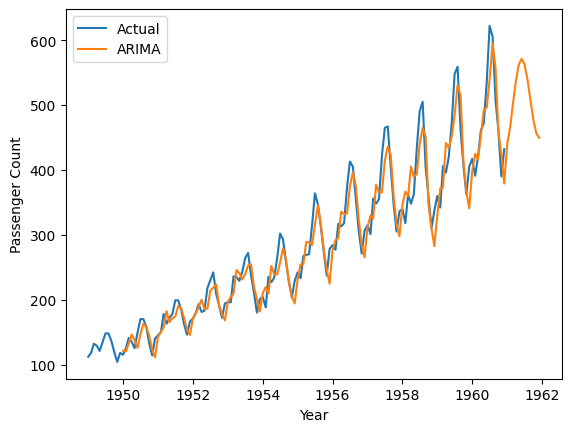

In [9]:
# 예측 결과 시각화
plt.plot(data, label='Actual')
plt.plot(pred, label='ARIMA')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend()

plt.show()